In [33]:
import numpy as np
import datetime
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from keras.utils import np_utils
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix , classification_report
from keras.preprocessing.image import ImageDataGenerator

In [88]:
# Import Cifar-10 dataset
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

### Data visualization

label = [0]


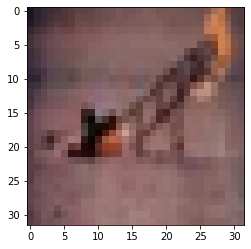

In [89]:
# Select a sample training image and visualize it
import random
i = random.randint(1, len(X_train))
plt.imshow(X_train[i])
print('label = {}'.format(y_train[i]))

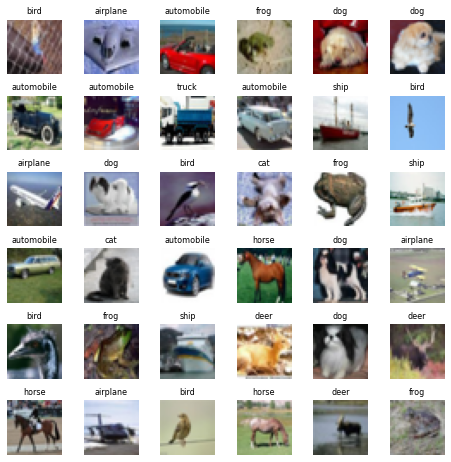

In [92]:
W_grid = 6
L_grid = 6

fig, axes = plt.subplots(L_grid, W_grid, figsize = (8, 8))
axes = axes.ravel()
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']
n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    label_index = int(y_train[index])
    axes[i].set_title(classes[label_index], fontsize = 8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

In [37]:
X_train.shape

(50000, 32, 32, 3)

In [38]:
y_train.shape

(50000, 1)

In [39]:
X_test.shape

(10000, 32, 32, 3)

In [40]:
y_test.shape

(10000, 1)

In [94]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
number_cat = 10

In [95]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [96]:
y_train = tf.keras.utils.to_categorical(y_train, number_cat)
y_test = tf.keras.utils.to_categorical(y_test, number_cat)

In [46]:
# plotting helper function
def plothist(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [79]:
def plotloss(loss):
    plt.plot(loss.history['loss'])
    plt.plot(loss.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

## Model 1

In [47]:
from keras.optimizers import SGD, Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization


model_1 = Sequential()

model_1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3),padding='same'))
model_1.add(BatchNormalization(axis=-1))
model_1.add(Conv2D(32, (3, 3), activation='relu',padding='same'))
model_1.add(BatchNormalization(axis=-1))
model_1.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 16x16x3xnum_filters


model_1.add(Flatten())
model_1.add(Dense(512, activation='relu'))
model_1.add(BatchNormalization())

model_1.add(Dense(number_cat, activation='softmax'))

model_1.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
model_1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_25 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_21 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_26 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                      

In [48]:
# training without augmentation
h1=model_1.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
391/391 [==============================] - 147s 368ms/step - loss: 1.2511 - accuracy: 0.5733 - val_loss: 7.5181 - val_accuracy: 0.1750
Epoch 2/10
391/391 [==============================] - 146s 374ms/step - loss: 0.8108 - accuracy: 0.7161 - val_loss: 1.0571 - val_accuracy: 0.6377
Epoch 3/10
391/391 [==============================] - 146s 373ms/step - loss: 0.5573 - accuracy: 0.8086 - val_loss: 1.0520 - val_accuracy: 0.6561
Epoch 4/10
391/391 [==============================] - 145s 372ms/step - loss: 0.3193 - accuracy: 0.8951 - val_loss: 1.2024 - val_accuracy: 0.6520
Epoch 5/10
391/391 [==============================] - 146s 375ms/step - loss: 0.1401 - accuracy: 0.9600 - val_loss: 1.3491 - val_accuracy: 0.6398
Epoch 6/10
391/391 [==============================] - 145s 371ms/step - loss: 0.0663 - accuracy: 0.9836 - val_loss: 1.2115 - val_accuracy: 0.6912
Epoch 7/10
391/391 [==============================] - 146s 373ms/step - loss: 0.0352 - accuracy: 0.9929 - val_loss: 1.4145 -

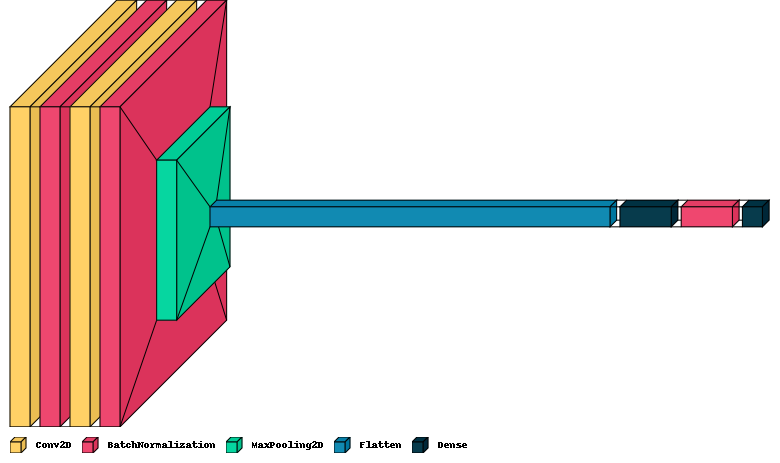

In [49]:
# import visualkeras
visualkeras.layered_view(model_1, scale_xy=10, legend=True)

In [50]:
#training accuracy without dropout
train_1_acc=model_1.evaluate(X_train,y_train)
train_1_acc

1563/1563 [==============================] - 44s 28ms/step - loss: 0.2977 - accuracy: 0.9007


[0.297718346118927, 0.9007200002670288]

In [51]:
test_1_acc=model_1.evaluate(X_test,y_test)
test_1_acc

313/313 [==============================] - 9s 29ms/step - loss: 1.7620 - accuracy: 0.6390


[1.7620457410812378, 0.6389999985694885]

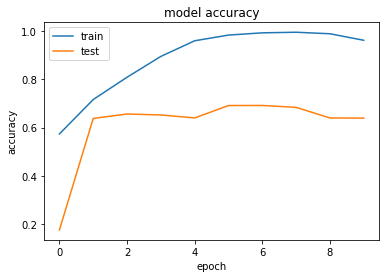

In [52]:
plothist(h1)

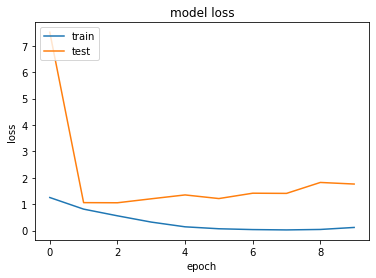

In [80]:
plotloss(h1)

In [98]:
p1 = model_1.predict(X_test) 
p1

313/313 [==============================] - 8s 24ms/step


array([[3.63908271e-06, 3.23177082e-04, 5.80342114e-02, ...,
        2.89737858e-04, 1.04379319e-02, 5.06375313e-01],
       [9.96045628e-07, 4.31248158e-01, 2.42889528e-11, ...,
        3.33135496e-15, 5.66604495e-01, 2.14636722e-03],
       [2.53008213e-03, 4.69238672e-04, 2.77838410e-08, ...,
        6.23126661e-09, 7.54730962e-03, 9.89453197e-01],
       ...,
       [2.07177369e-08, 7.53600307e-11, 3.27664711e-05, ...,
        5.89295523e-05, 6.93073554e-09, 2.42485413e-07],
       [6.00334082e-04, 9.99299049e-01, 6.74423095e-09, ...,
        4.32775010e-07, 1.57080404e-09, 1.08482473e-10],
       [2.02300357e-10, 7.36392678e-07, 5.44721206e-06, ...,
        9.99842167e-01, 3.98890573e-11, 1.15486515e-07]], dtype=float32)

In [99]:
p1 = p1.argmax(1)

In [100]:
y_test_1 = y_test.argmax(1)

<AxesSubplot:>

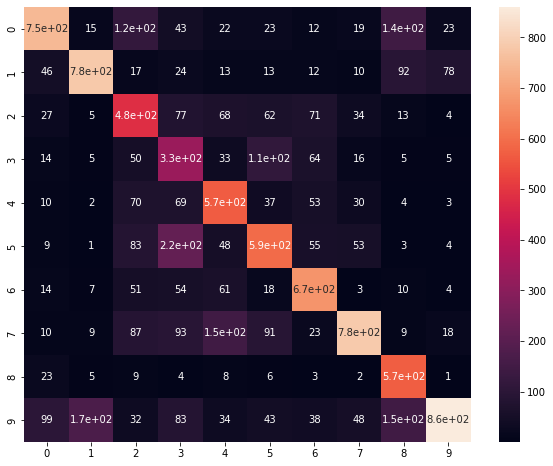

In [101]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(p1, y_test_1)
cm

plt.figure(figsize = (10, 8))
sns.heatmap(cm, annot = True)

## model 2

In [53]:
model_2 = Sequential()

model_2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3),padding='same'))
model_2.add(BatchNormalization(axis=-1))
model_2.add(Conv2D(32, (3, 3), activation='relu',padding='same'))
model_2.add(BatchNormalization(axis=-1))
model_2.add(MaxPooling2D(pool_size=(2, 2)))


model_2.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model_2.add(BatchNormalization(axis=-1))
model_2.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model_2.add(BatchNormalization(axis=-1))
model_2.add(MaxPooling2D(pool_size=(2, 2))) 



model_2.add(Flatten())
model_2.add(Dense(512, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dense(number_cat, activation='softmax'))

model_2.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_28 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_23 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_29 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                      

In [54]:
h2=model_2.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
391/391 [==============================] - 222s 552ms/step - loss: 1.1776 - accuracy: 0.5965 - val_loss: 3.2549 - val_accuracy: 0.2420
Epoch 2/10
391/391 [==============================] - 211s 540ms/step - loss: 0.7570 - accuracy: 0.7360 - val_loss: 1.0524 - val_accuracy: 0.6648
Epoch 3/10
391/391 [==============================] - 213s 546ms/step - loss: 0.5776 - accuracy: 0.7985 - val_loss: 0.9311 - val_accuracy: 0.6964
Epoch 4/10
391/391 [==============================] - 222s 567ms/step - loss: 0.4286 - accuracy: 0.8528 - val_loss: 0.7844 - val_accuracy: 0.7396
Epoch 5/10
391/391 [==============================] - 221s 564ms/step - loss: 0.2917 - accuracy: 0.9003 - val_loss: 0.8949 - val_accuracy: 0.7332
Epoch 6/10
391/391 [==============================] - 220s 562ms/step - loss: 0.1735 - accuracy: 0.9433 - val_loss: 0.9089 - val_accuracy: 0.7388
Epoch 7/10
391/391 [==============================] - 213s 546ms/step - loss: 0.1021 - accuracy: 0.9674 - val_loss: 0.9311 -

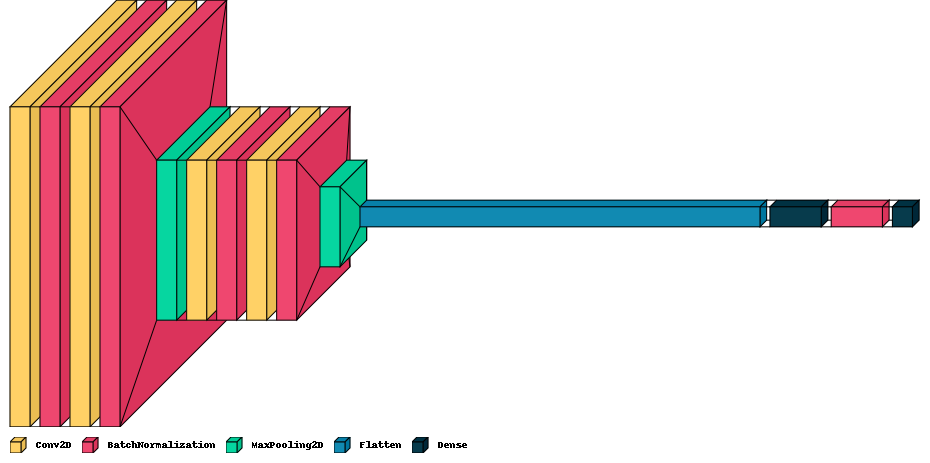

In [55]:
visualkeras.layered_view(model_2, scale_xy=10, legend=True)

In [56]:
#training accuracy without dropout
train_2_acc=model_2.evaluate(X_train,y_train)
train_2_acc

1563/1563 [==============================] - 62s 40ms/step - loss: 0.0884 - accuracy: 0.9691


[0.08837141841650009, 0.9690999984741211]

In [57]:
test_2_acc=model_2.evaluate(X_test,y_test)
test_2_acc

313/313 [==============================] - 12s 38ms/step - loss: 1.1324 - accuracy: 0.7470


[1.132367730140686, 0.746999979019165]

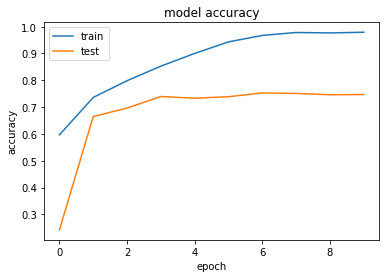

In [58]:
plothist(h2)

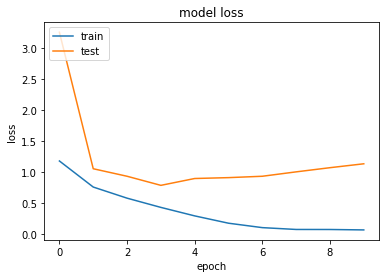

In [81]:
plotloss(h2)

In [102]:
p2 = model_2.predict(X_test)

313/313 [==============================] - 9s 28ms/step


In [103]:
p2 = p2.argmax(1)

<AxesSubplot:>

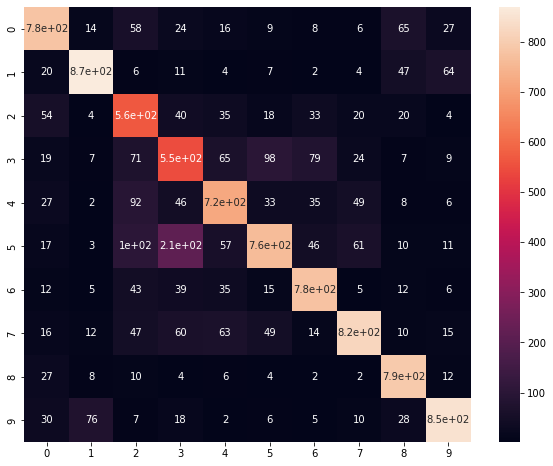

In [104]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(p2, y_test_1)
cm

plt.figure(figsize = (10, 8))
sns.heatmap(cm, annot = True)

## model 3

In [59]:
model_3 = Sequential()

model_3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3),padding='same'))
model_3.add(BatchNormalization(axis=-1))
model_3.add(Conv2D(32, (3, 3), activation='relu',padding='same'))
model_3.add(BatchNormalization(axis=-1))
model_3.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 16x16x3xnum_filters


model_3.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model_3.add(BatchNormalization(axis=-1))
model_3.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model_3.add(BatchNormalization(axis=-1))
model_3.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 8x8x3x(2*num_filters)


model_3.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model_3.add(BatchNormalization(axis=-1))
model_3.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model_3.add(BatchNormalization(axis=-1))
model_3.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 4x4x3x(4*num_filters)


model_3.add(Flatten())
model_3.add(Dense(512, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dense(number_cat, activation='softmax'))

model_3.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
model_3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_33 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_27 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_34 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                      

In [60]:
h3=model_3.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
391/391 [==============================] - 241s 601ms/step - loss: 1.1988 - accuracy: 0.5816 - val_loss: 2.0665 - val_accuracy: 0.3174
Epoch 2/10
391/391 [==============================] - 248s 635ms/step - loss: 0.7452 - accuracy: 0.7401 - val_loss: 0.7968 - val_accuracy: 0.7304
Epoch 3/10
391/391 [==============================] - 251s 642ms/step - loss: 0.5678 - accuracy: 0.8019 - val_loss: 0.7728 - val_accuracy: 0.7384
Epoch 4/10
391/391 [==============================] - 237s 607ms/step - loss: 0.4323 - accuracy: 0.8470 - val_loss: 0.8820 - val_accuracy: 0.7256
Epoch 5/10
391/391 [==============================] - 249s 637ms/step - loss: 0.3276 - accuracy: 0.8844 - val_loss: 0.8064 - val_accuracy: 0.7629
Epoch 6/10
391/391 [==============================] - 249s 637ms/step - loss: 0.2365 - accuracy: 0.9177 - val_loss: 0.9218 - val_accuracy: 0.7436
Epoch 7/10
391/391 [==============================] - 241s 618ms/step - loss: 0.1652 - accuracy: 0.9423 - val_loss: 0.9238 -

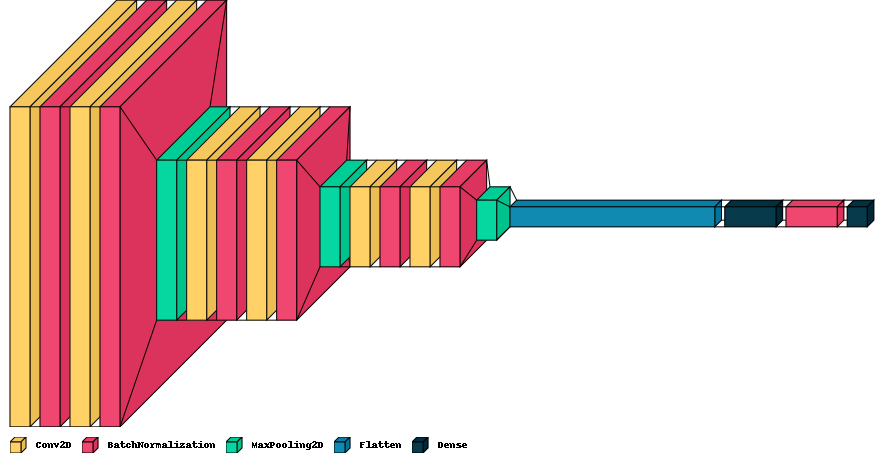

In [61]:
visualkeras.layered_view(model_3, scale_xy=10, legend=True)

In [62]:
#training accuracy without dropout
train_3_acc=model_3.evaluate(X_train,y_train)
train_3_acc

1563/1563 [==============================] - 69s 44ms/step - loss: 0.1073 - accuracy: 0.9623


[0.10731476545333862, 0.9622799754142761]

In [63]:
test_3_acc=model_3.evaluate(X_test,y_test)
test_3_acc

313/313 [==============================] - 14s 44ms/step - loss: 0.8852 - accuracy: 0.7842


[0.8851671814918518, 0.7842000126838684]

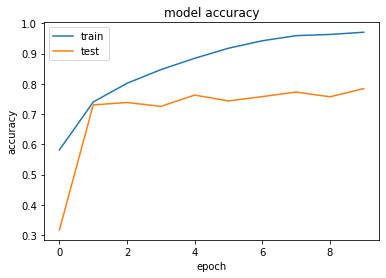

In [64]:
plothist(h3)

313/313 [==============================] - 14s 44ms/step


<AxesSubplot:>

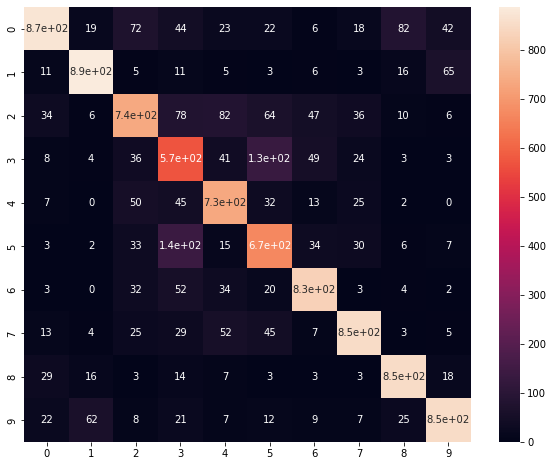

In [106]:
p3 = model_3.predict(X_test)
p3 = p3.argmax(1)
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(p3, y_test_1)
cm

plt.figure(figsize = (10, 8))
sns.heatmap(cm, annot = True)

## model 4 (model 3+ drop)

In [65]:
model_4 = Sequential()

model_4.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3),padding='same'))
model_4.add(BatchNormalization(axis=-1))
model_4.add(Conv2D(32, (3, 3), activation='relu',padding='same'))
model_4.add(BatchNormalization(axis=-1))
model_4.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 16x16x3xnum_filters
model_4.add(Dropout(0.3))

model_4.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model_4.add(BatchNormalization(axis=-1))
model_4.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model_4.add(BatchNormalization(axis=-1))
model_4.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 8x8x3x(2*num_filters)
model_4.add(Dropout(0.3))

model_4.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model_4.add(BatchNormalization(axis=-1))
model_4.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model_4.add(BatchNormalization(axis=-1))
model_4.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 4x4x3x(4*num_filters)
model_4.add(Dropout(0.3))

model_4.add(Flatten())
model_4.add(Dense(512, activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.3))
model_4.add(Dense(number_cat, activation='softmax'))

model_4.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

In [66]:
h4=model_4.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
391/391 [==============================] - 257s 646ms/step - loss: 1.5404 - accuracy: 0.4783 - val_loss: 2.8145 - val_accuracy: 0.2145
Epoch 2/10
391/391 [==============================] - 253s 648ms/step - loss: 1.0112 - accuracy: 0.6417 - val_loss: 0.8695 - val_accuracy: 0.6950
Epoch 3/10
391/391 [==============================] - 250s 638ms/step - loss: 0.8328 - accuracy: 0.7067 - val_loss: 0.8313 - val_accuracy: 0.7150
Epoch 4/10
391/391 [==============================] - 249s 638ms/step - loss: 0.7355 - accuracy: 0.7398 - val_loss: 0.6938 - val_accuracy: 0.7588
Epoch 5/10
391/391 [==============================] - 256s 656ms/step - loss: 0.6644 - accuracy: 0.7659 - val_loss: 0.7817 - val_accuracy: 0.7292
Epoch 6/10
391/391 [==============================] - 257s 658ms/step - loss: 0.6044 - accuracy: 0.7888 - val_loss: 0.6904 - val_accuracy: 0.7644
Epoch 7/10
391/391 [==============================] - 259s 662ms/step - loss: 0.5501 - accuracy: 0.8063 - val_loss: 0.6825 -

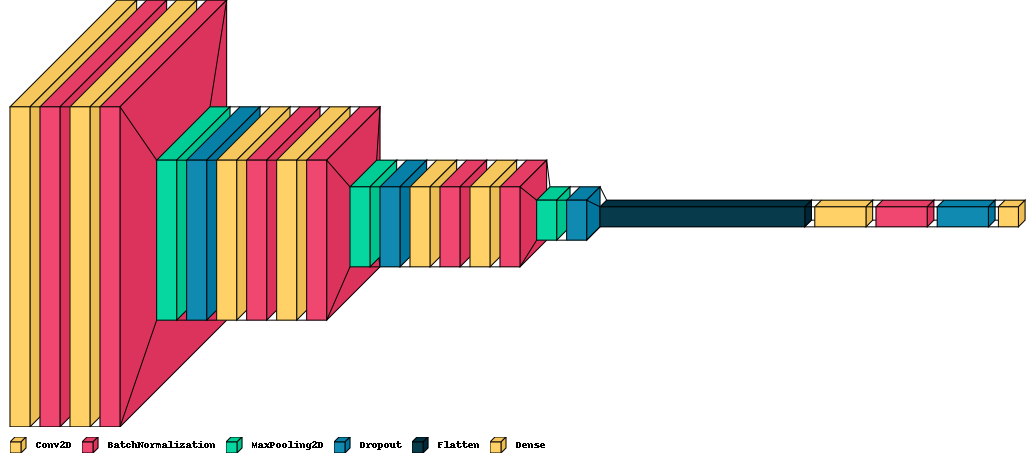

In [82]:
visualkeras.layered_view(model_4, scale_xy=10, legend=True)

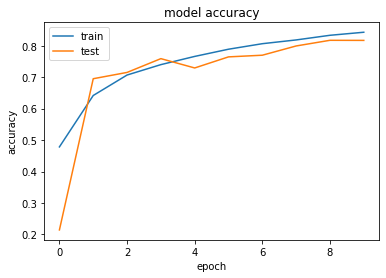

In [84]:
plothist(h4)

313/313 [==============================] - 13s 40ms/step


<AxesSubplot:>

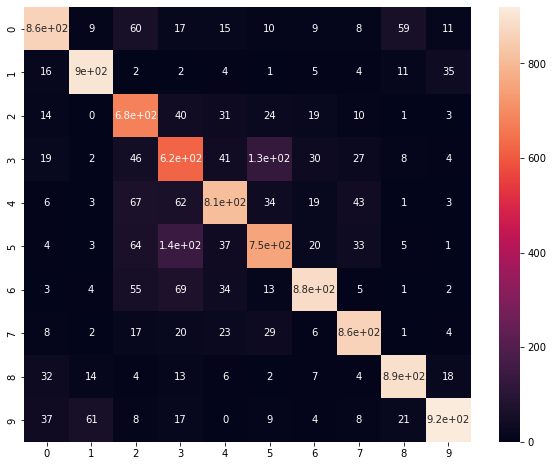

In [107]:
p4 = model_4.predict(X_test)
p4 = p4.argmax(1)
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(p4, y_test_1)
cm

plt.figure(figsize = (10, 8))
sns.heatmap(cm, annot = True)

## Model 4 while increasing the epochs to 20

In [67]:
ac='relu'
adm=Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
opt=adm
drop_dense=0.5
drop_conv=0

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3),padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(32, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 16x16x3xnum_filters
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 8x8x3x(2*num_filters)
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 4x4x3x(4*num_filters)
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(number_cat, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [68]:
# training without augmentation
history=model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
391/391 [==============================] - 271s 672ms/step - loss: 1.7093 - accuracy: 0.4372 - val_loss: 2.7447 - val_accuracy: 0.2393
Epoch 2/20
391/391 [==============================] - 262s 670ms/step - loss: 1.1176 - accuracy: 0.6046 - val_loss: 1.0741 - val_accuracy: 0.6402
Epoch 3/20
391/391 [==============================] - 266s 679ms/step - loss: 0.9125 - accuracy: 0.6745 - val_loss: 0.8750 - val_accuracy: 0.7008
Epoch 4/20
391/391 [==============================] - 261s 669ms/step - loss: 0.8004 - accuracy: 0.7174 - val_loss: 0.7659 - val_accuracy: 0.7316
Epoch 5/20
391/391 [==============================] - 251s 641ms/step - loss: 0.7241 - accuracy: 0.7455 - val_loss: 0.6609 - val_accuracy: 0.7724
Epoch 6/20
391/391 [==============================] - 242s 619ms/step - loss: 0.6534 - accuracy: 0.7690 - val_loss: 0.6170 - val_accuracy: 0.7869
Epoch 7/20
391/391 [==============================] - 258s 660ms/step - loss: 0.6093 - accuracy: 0.7869 - val_loss: 0.6039 -

In [28]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model10epoch_nodrop.h5")
print("Saved model to disk")

Saved model to disk


In [21]:
from tensorflow.keras.models import model_from_json

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
cnn = model_from_json(loaded_model_json)
# load weights into new model
cnn.load_weights("model10epoch_nodrop.h5")
print("Loaded model from disk")

Loaded model from disk


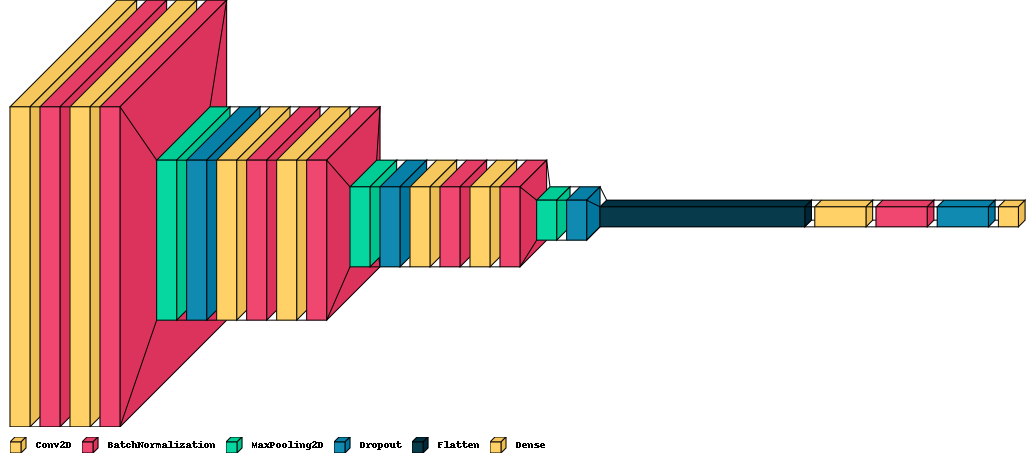

In [69]:
import visualkeras
visualkeras.layered_view(model, scale_xy=10, legend=True)

In [23]:

train_acc=model.evaluate(X_train,y_train)
train_acc

1563/1563 [==============================] - 82s 52ms/step - loss: 2.3023 - accuracy: 0.1050


[2.30232834815979, 0.10496000200510025]

In [97]:
#test accuracy without dropout
test_acc=model.evaluate(X_test,y_test)
test_acc

313/313 [==============================] - 13s 40ms/step - loss: 0.5159 - accuracy: 0.8406


[0.5159456729888916, 0.8406000137329102]

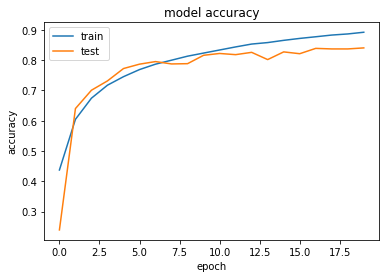

In [70]:
plothist(history)

In [71]:
predicted_classes = model.predict(X_test) 
predicted_classes

313/313 [==============================] - 18s 55ms/step


array([[2.40867390e-04, 4.47706645e-03, 2.38472247e-04, ...,
        5.60588622e-03, 1.09197637e-02, 1.65625091e-03],
       [4.52586437e-06, 4.14680282e-04, 3.64332262e-12, ...,
        2.20463383e-12, 9.99580681e-01, 8.90766856e-08],
       [4.02390352e-03, 4.10603136e-02, 8.18583999e-07, ...,
        1.42759791e-06, 9.52868164e-01, 2.04182742e-03],
       ...,
       [2.18275287e-09, 2.52338350e-09, 1.80884817e-05, ...,
        1.34520480e-04, 2.25759095e-07, 4.09319476e-08],
       [2.47045774e-02, 9.74678755e-01, 1.61437329e-05, ...,
        3.91614507e-04, 1.74636461e-05, 1.01529804e-04],
       [1.97361447e-10, 3.92737301e-11, 3.24452776e-09, ...,
        9.99993443e-01, 4.04330978e-11, 9.28807487e-13]], dtype=float32)

In [72]:
predicted_classes = predicted_classes.argmax(1)
predicted_classes

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [73]:
y_test_t = y_test.argmax(1)

<AxesSubplot:>

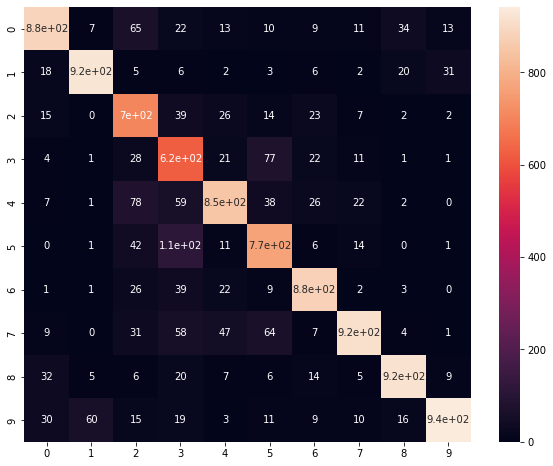

In [74]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(predicted_classes, y_test_t)
cm

plt.figure(figsize = (10, 8))
sns.heatmap(cm, annot = True)

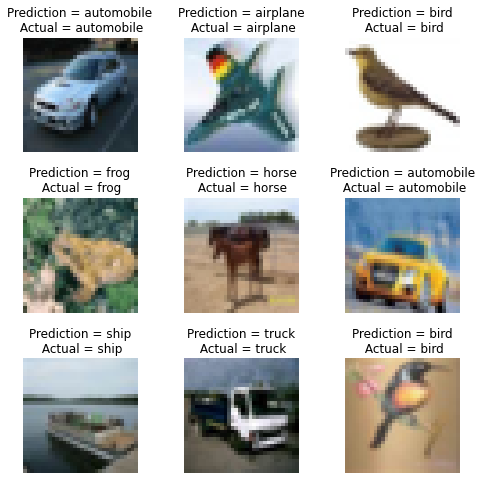

In [87]:
L = 3
W = 3
fig, axes = plt.subplots(L, W, figsize = (8, 8))
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']
axes = axes.ravel()
n_test = len(X_test)
for i in np.arange(0, L*W):
    index = np.random.randint(0, n_test)
    axes[i].imshow(X_test[index])
    axes[i].set_title('Prediction = {}\n Actual = {}'.format(classes[predicted_classes[index]], classes[y_test_t[index]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 0.3) 
plt.subplots_adjust(hspace = 0.4)

In [76]:
print("Classification report: \n" , classification_report(y_test_t, predicted_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.88      0.85      1000
           1       0.91      0.92      0.92      1000
           2       0.85      0.70      0.77      1000
           3       0.79      0.62      0.70      1000
           4       0.78      0.85      0.81      1000
           5       0.80      0.77      0.78      1000
           6       0.90      0.88      0.89      1000
           7       0.81      0.92      0.86      1000
           8       0.90      0.92      0.91      1000
           9       0.84      0.94      0.89      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

